<h1 style="text-align:center; color:black;">Predictive Maintenance: Enhancing Equipment Reliability with Machine Learning</h1>

# Work Overview

The workflow of this project involves the following key steps:

1. **Data Collection & Exploration**  
   - Load and explore the credit card transaction dataset.
   - Understand the distribution of fraudulent and legitimate transactions.

2. **Data Preprocessing**  
   - Handle missing or incorrect data.
   - Address the class imbalance issue using techniques like SMOTE (Synthetic Minority Over-sampling Technique).
   - Feature scaling and selection.

3. **Model Building & Evaluation**  
   - Train various machine learning models (Logistic Regression, Decision Trees, Random Forest).
   - Evaluate models using accuracy, precision, recall, F1-score, and AUC-ROC curve.
   - Fine-tune models using hyperparameter tuning.

4. **Result Analysis & Visualization**  
   - Visualize the performance of different models.
   - Compare and analyze results.
   - Provide recommendations for further improvement in fraud detection.


### Importing Packages and Loading The Dataset

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
import plotly.figure_factory as ff

In [3]:
# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Display the first few rows of the data
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

### Column Descriptions:

1. **UDI**: Unique identifier for each data point (record). This is likely a serial number or primary key used to distinguish between different observations.
   
2. **Product ID**: A unique identifier for each product or piece of equipment being monitored for predictive maintenance.

3. **Type**: The type or category of equipment or machinery. This column helps to distinguish between different types of machines.

4. **Air temperature [K]**: The air temperature around the equipment, measured in Kelvin. Temperature can impact machine performance.

5. **Process temperature [K]**: The temperature of the process or operation happening inside the machinery, also measured in Kelvin.

6. **Rotational speed [rpm]**: The speed at which the machine or part of the machine is rotating, measured in revolutions per minute (rpm).

7. **Torque [Nm]**: The torque or rotational force applied by or on the machinery, measured in Newton meters (Nm).

8. **Tool wear [min]**: The amount of wear on the tool being used by the equipment, measured in minutes of use.

9. **Target**: The target variable indicating whether the equipment is likely to fail. This is typically a binary variable (0 for no failure, 1 for failure).

10. **Failure Type**: The type or category of failure (if any) experienced by the equipment. This could include different types of machine breakdowns or malfunctions.


### Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
# Columns in the dataset
print("Column names:", data.columns.tolist())

Column names: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']


In [7]:
# The shape of the dataset
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 10000 rows and 10 columns.


In [8]:
# Statistical measurements
data.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [9]:
# Checking dublicated rows
data.duplicated().sum()

0

<Axes: >

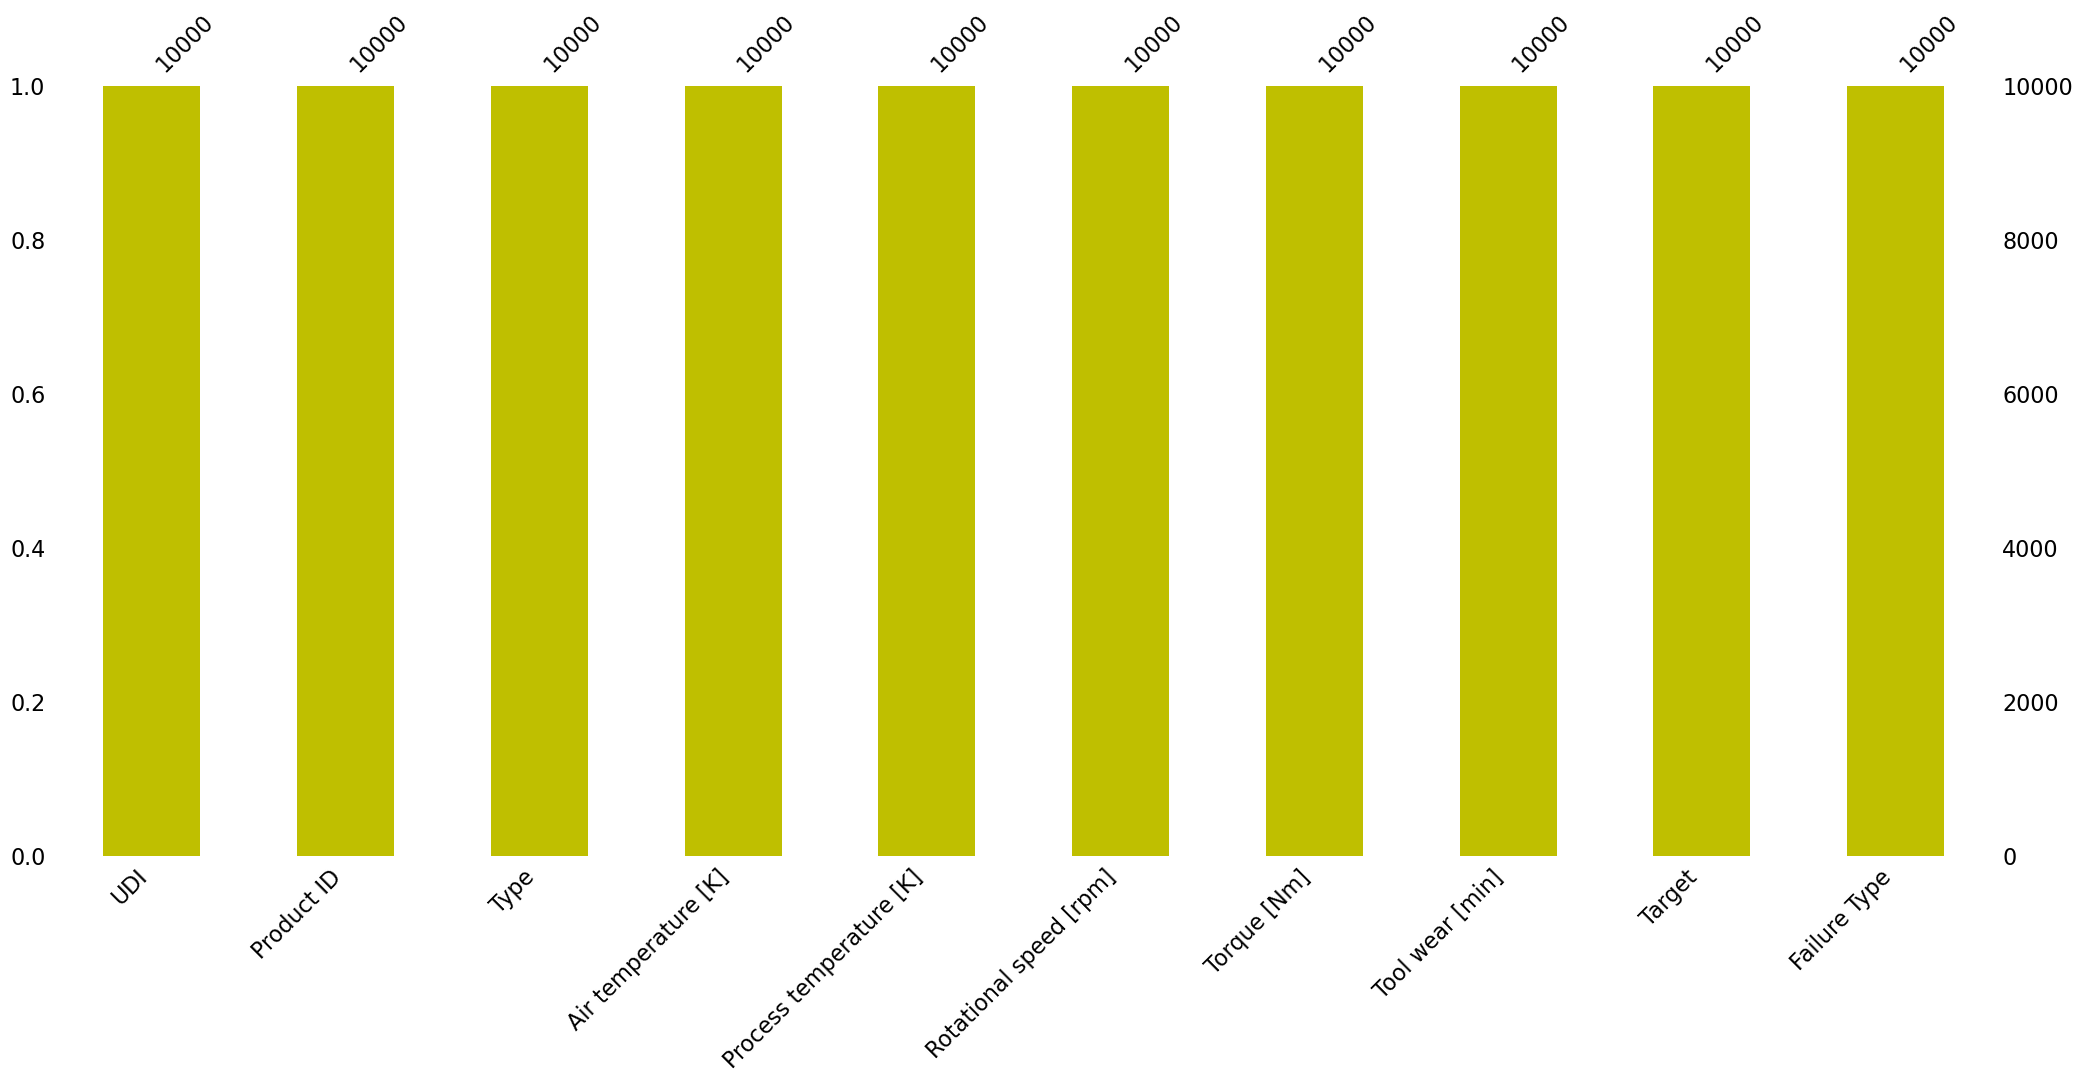

In [11]:
# Checking null values
msno.bar(data,color='y')

### Exploratory Data Analysis

#### Univariate Analysis

In [12]:
# Function to visualize categorical columns
def univariate(category, title):
    cat = category.value_counts()
    fig = px.bar(
        x=cat.index, 
        y=cat.values,
        color=cat.index, 
        labels={"x": category.name, "y": "Counts"},
    )
    
    fig.update_layout(
        title_text=title,  # Set the title parameter here
        title_x=0.5,  # Center align the title
        title_font_size=25,  # Adjust title font size
        title_font_family='Arial',  # Adjust title font family
        title_font_color='black'  # Adjust title font color
    )
    
    fig.show()

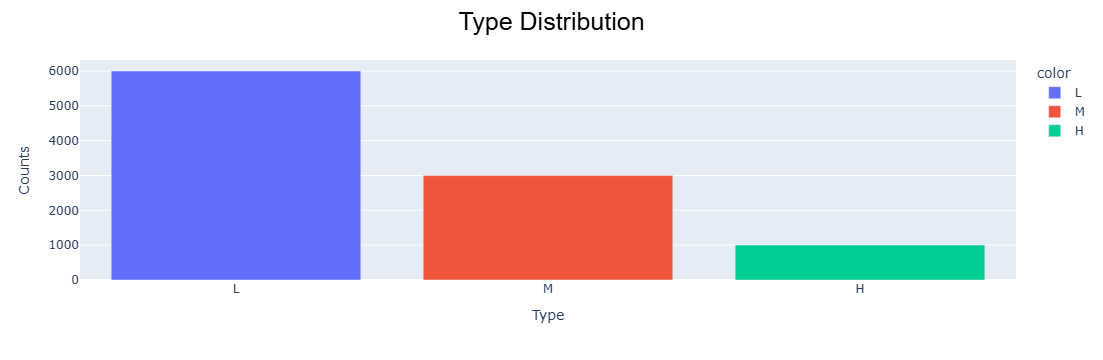

In [13]:
univariate(data['Type'],'Type Distribution')

##### **Type Distribution**
The Type distribution is **imbalanced**

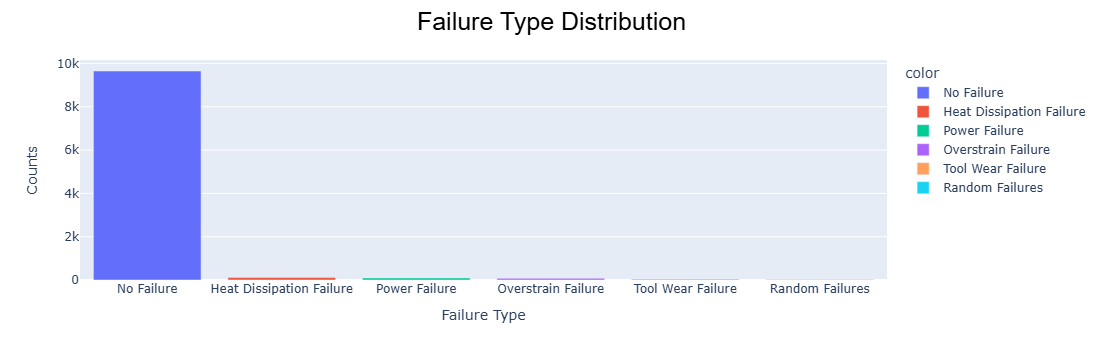

In [14]:
univariate(data['Failure Type'],'Failure Type Distribution')

##### **Failure Type Distribution**
The Failure Type is **imbalanced**

In [17]:
# Function to visualize numerical columns
def histogram ( data , x,title):
    fig = px.histogram(data , x )
    fig.update_layout(
        title={
            'text': title,
            'y':0.95,
            'x':0.5,
            'font': dict(
                size=24,
            )
        }
    )
    fig.show()

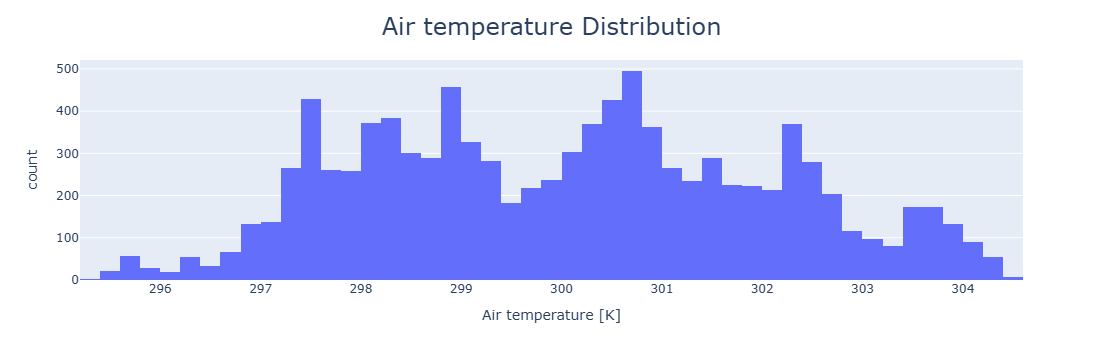

In [18]:
histogram(data , x = "Air temperature [K]", title="Air temperature Distribution")

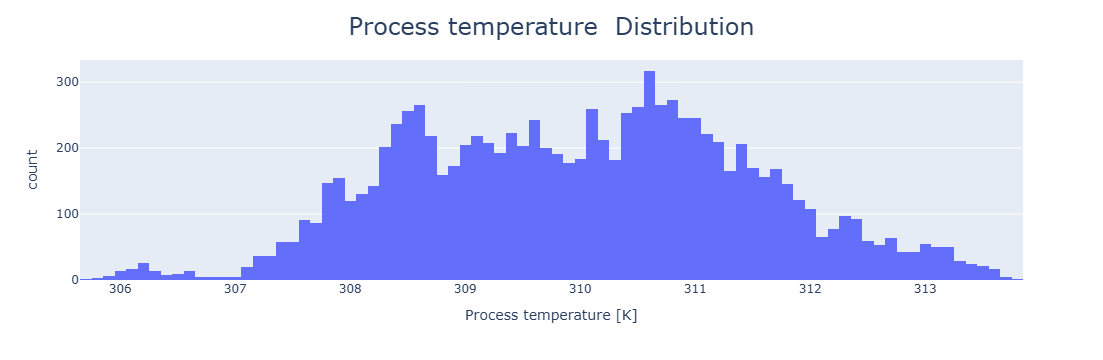

In [19]:
histogram(data , x = "Process temperature [K]", title="Process temperature  Distribution")

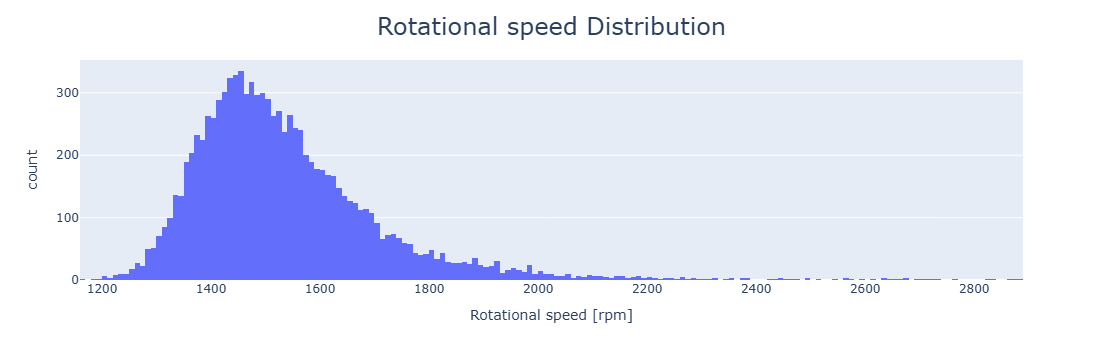

In [20]:
histogram(data , x = "Rotational speed [rpm]", title="Rotational speed Distribution")

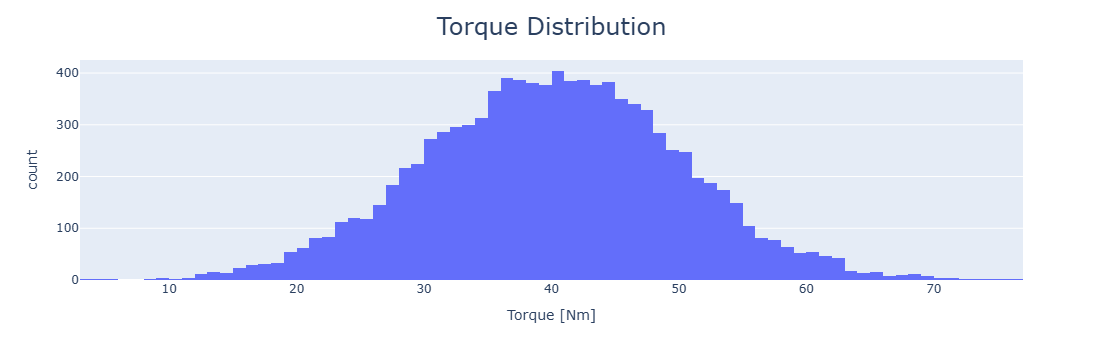

In [21]:
histogram(data , x = "Torque [Nm]", title="Torque Distribution")

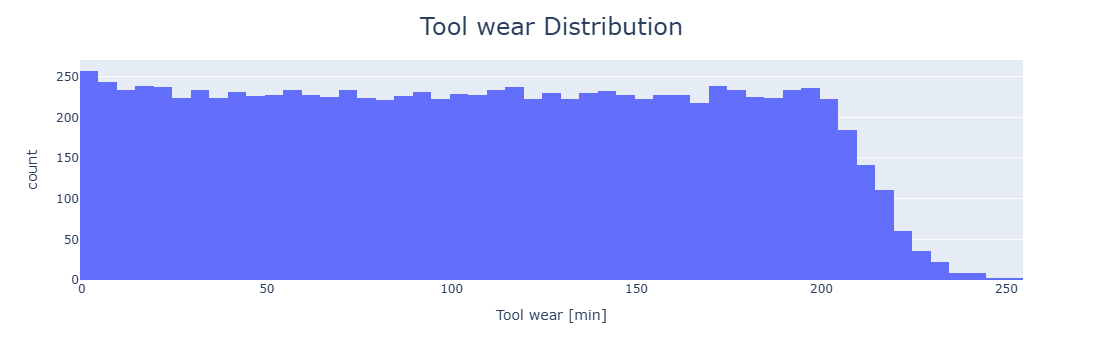

In [22]:
histogram(data , x = "Tool wear [min]", title="Tool wear Distribution")

##### **Observations**
All columns are normally distributed

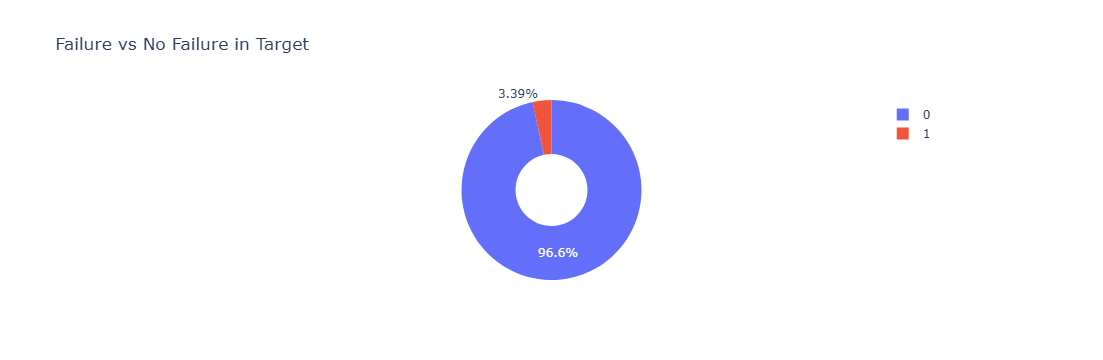

In [24]:
# Count the values in the Target column (assuming 0 for no failure and 1 for failure)
target_counts = data['Target'].value_counts()

# Create a pie chart
fig = px.pie(values=target_counts.values, 
             names=target_counts.index, 
             title='Failure vs No Failure in Target',
             labels={'index': 'Failure Status'},
             hole=0.4)

# Display the pie chart
fig.show()

**Target Column** is not balanced

#### Bivariate Analysis

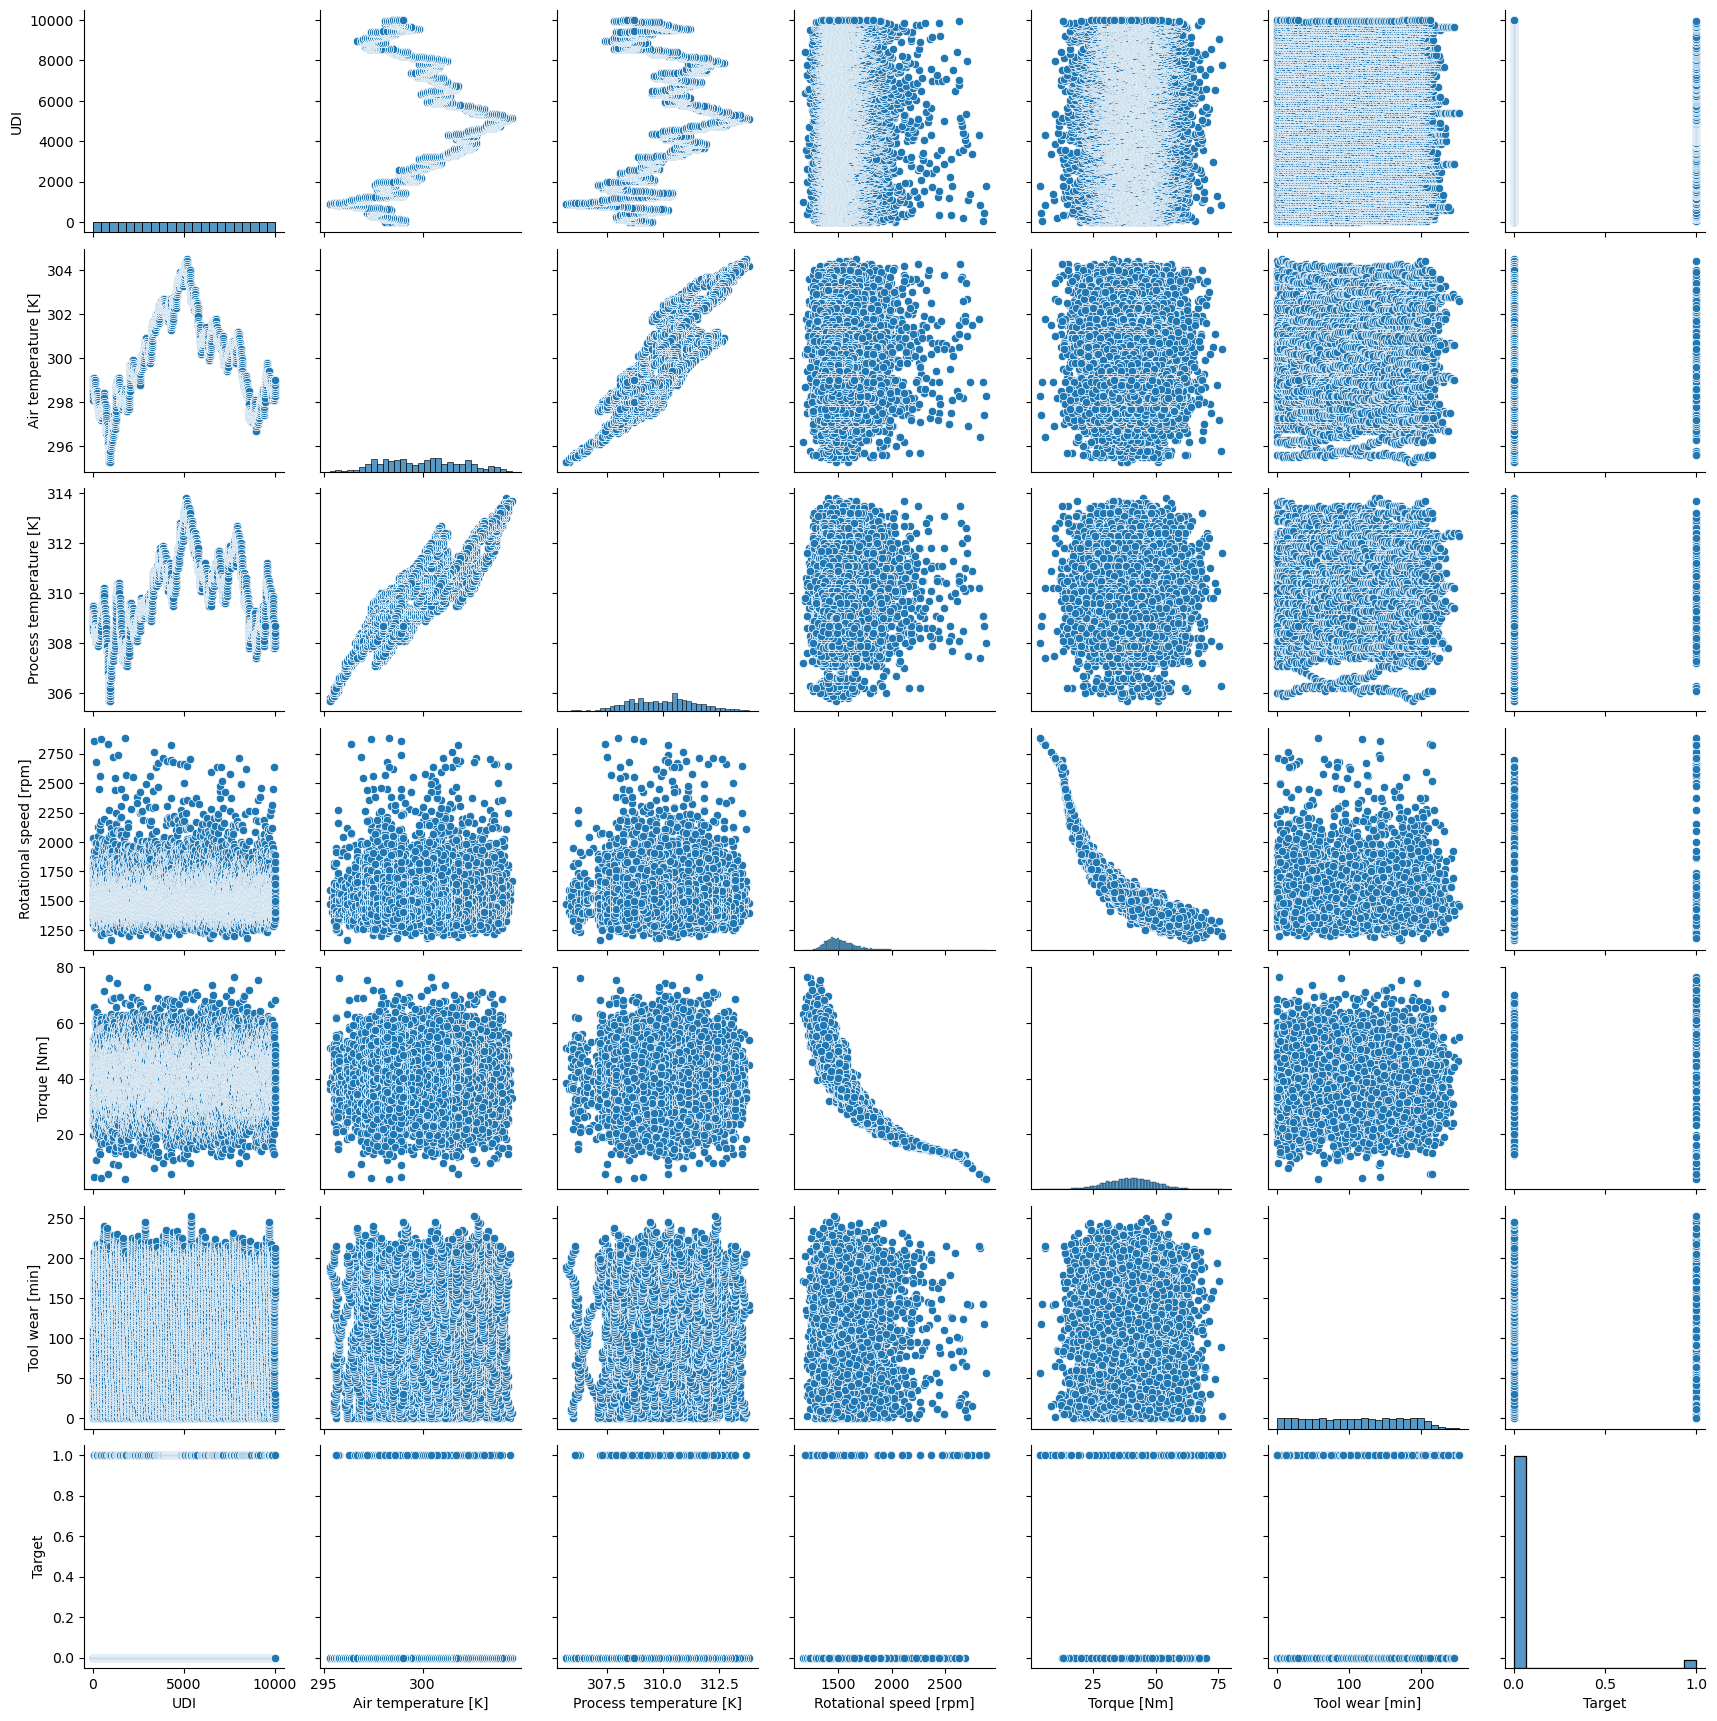

In [29]:
sns.pairplot(data)

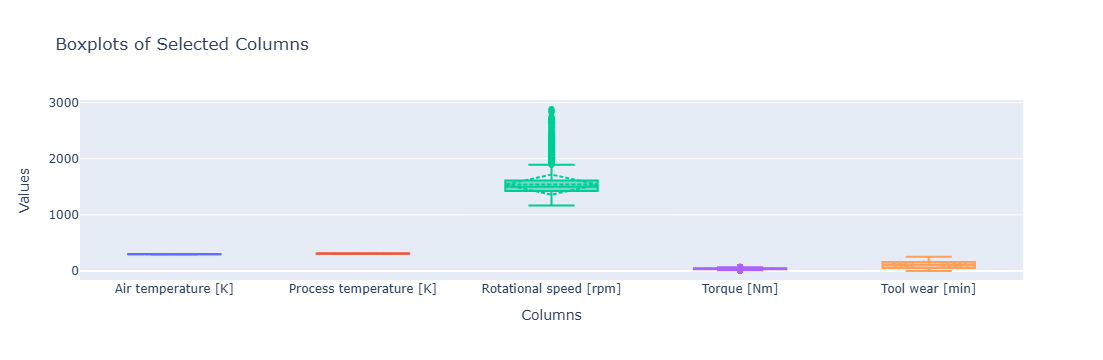

In [26]:
# Function to create boxplots for specified columns in one plot
def draw_combined_boxplots(data, columns):
    fig = go.Figure()

    # Add a boxplot for each column
    for col in columns:
        fig.add_trace(go.Box(y=data[col], name=col, boxmean='sd', boxpoints='outliers'))

    # Update layout for the combined plot
    fig.update_layout(
        title="Boxplots of Selected Columns",
        yaxis_title="Values",
        xaxis_title="Columns",
        showlegend=False
    )

    # Show the combined plot
    fig.show()

# List of columns you want to plot
columns_to_plot = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Call the function to draw combined boxplots for the selected columns
draw_combined_boxplots(data, columns_to_plot)

### Observations:
- The **Rotational speed [rpm]** column contains noticeable outliers, as seen in the boxplot.

### Data Cleaning

**Reomve Outliers**

In [32]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

print(f"Original data shape: {data.shape}")
data = remove_outliers(data, 'Rotational speed [rpm]')
print(f"Data shape after removing outliers: {data.shape}")

Original data shape: (9582, 10)
Data shape after removing outliers: (9474, 10)


In [33]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

**Label Encoding**

In [36]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Type' column
data['Type'] = label_encoder.fit_transform(data['Type'])

data['Type'].value_counts()

Type
1    5681
2    2839
0     954
Name: count, dtype: int64

### Data Splitting

In [40]:
# Separating features (X) and target (y)
X = data.drop(['Target', 'UDI', 'Product ID','Failure Type'], axis=1)
y = data['Target']

In [41]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Applying SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

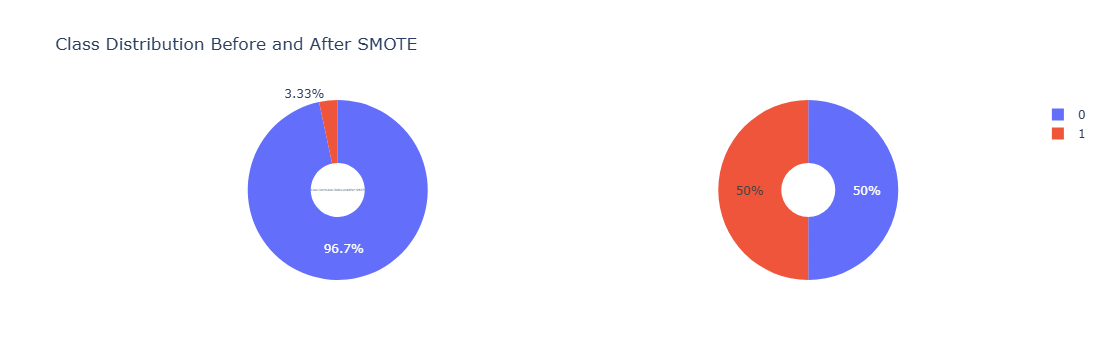

In [43]:
# Count the number of samples in each class before SMOTE
class_counts_before = y_train.value_counts().reset_index()
class_counts_before.columns = ['Class', 'Number of Samples']

# Count the number of samples in each class after SMOTE
class_counts_after = pd.Series(y_train_res).value_counts().reset_index()
class_counts_after.columns = ['Class', 'Number of Samples']

# Create pie charts for both before and after SMOTE
fig = go.Figure()

# Pie chart before SMOTE
fig.add_trace(go.Pie(
    labels=class_counts_before['Class'],
    values=class_counts_before['Number of Samples'],
    name='Before SMOTE',
    title='Class Distribution Before and After SMOTE',
    hole=0.3,
    domain=dict(row=0, column=0)
))

# Pie chart after SMOTE
fig.add_trace(go.Pie(
    labels=class_counts_after['Class'],
    values=class_counts_after['Number of Samples'],
    name='After SMOTE',
    hole=0.3,
    domain=dict(row=0, column=1)
))

# Update layout to use subplots
fig.update_layout(
    grid=dict(rows=1, columns=2),
    title_text='Class Distribution Before and After SMOTE',

)

fig.show()

#### Observations
We applied SMOTE to handle the class imbalance

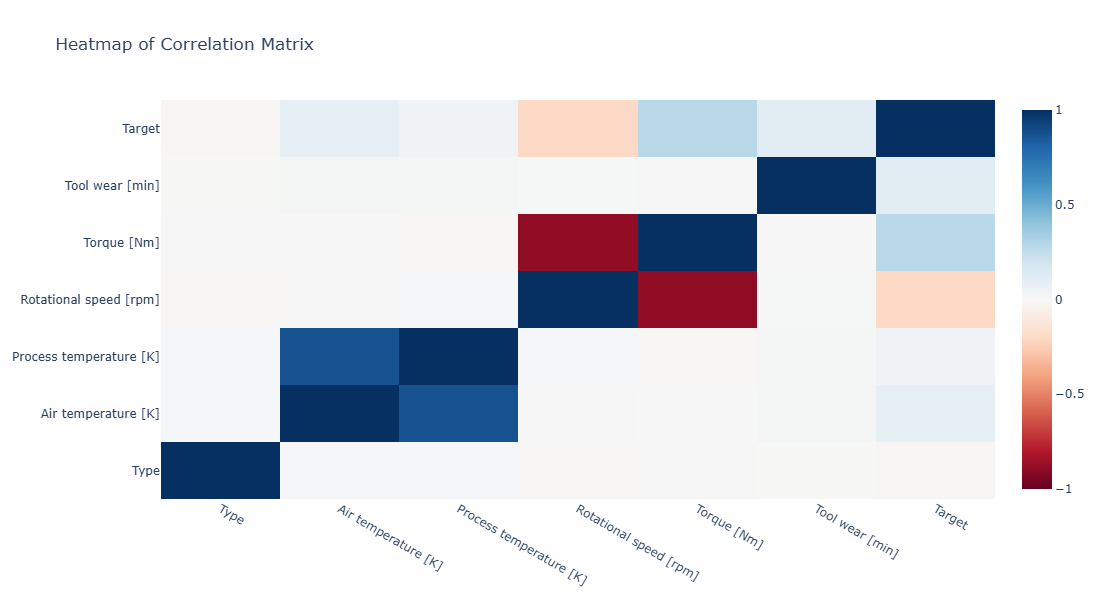

In [45]:
# compute the correlation matrix
corr =data.drop([ 'UDI', 'Product ID','Failure Type'], axis=1)
correlation_matrix = corr.corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1
))

fig.update_layout(
    title='Heatmap of Correlation Matrix',
    xaxis_nticks=36,
    width=600,
    height=600,
    margin=dict(l=100, r=100, t=100, b=100)
)

fig.show()

### Model Building and Comparison

In [47]:
# Helper function to visualize confusion matrix
def plot_confusion_matrix(cm, title):
    z = cm
    x = ['Non-Fraud', 'Fraud']
    y = ['Non-Fraud', 'Fraud']
    
    fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
    fig.update_layout(title=title)
    fig.show()

In [48]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)
y_pred_log = log_reg.predict(X_test)

In [49]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

In [51]:
# Model Evaluation: Classification Report and AUC-ROC Score
models = ['Logistic Regression', 'Random Forest']
predictions = [y_pred_log, y_pred_rf]

In [54]:
for i, model in enumerate(models):
    print(f"--- {model} ---")
    print(classification_report(y_test, predictions[i]))

    # Calculate and print accuracy
    train_accuracy = accuracy_score(y_train_res, [log_reg.predict(X_train_res) if model == 'Logistic Regression' else rf.predict(X_train_res)][0])
    test_accuracy = accuracy_score(y_test, predictions[i])
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # AUC-ROC score
    print(f"AUC-ROC: {roc_auc_score(y_test, predictions[i])}\n")

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2762
           1       0.13      0.83      0.23        81

    accuracy                           0.84      2843
   macro avg       0.56      0.83      0.57      2843
weighted avg       0.97      0.84      0.89      2843

Train Accuracy: 0.8528
Test Accuracy: 0.8396
AUC-ROC: 0.8335657646543478

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2762
           1       0.43      0.77      0.55        81

    accuracy                           0.96      2843
   macro avg       0.71      0.87      0.76      2843
weighted avg       0.98      0.96      0.97      2843

Train Accuracy: 1.0000
Test Accuracy: 0.9641
AUC-ROC: 0.8676907054290591



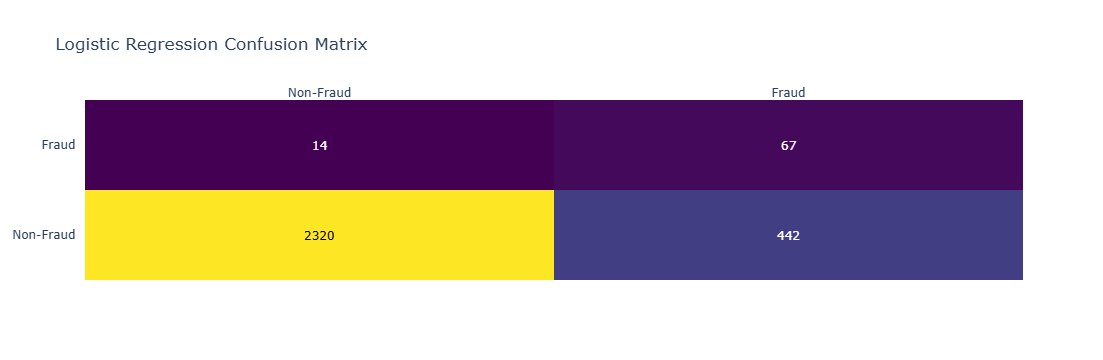

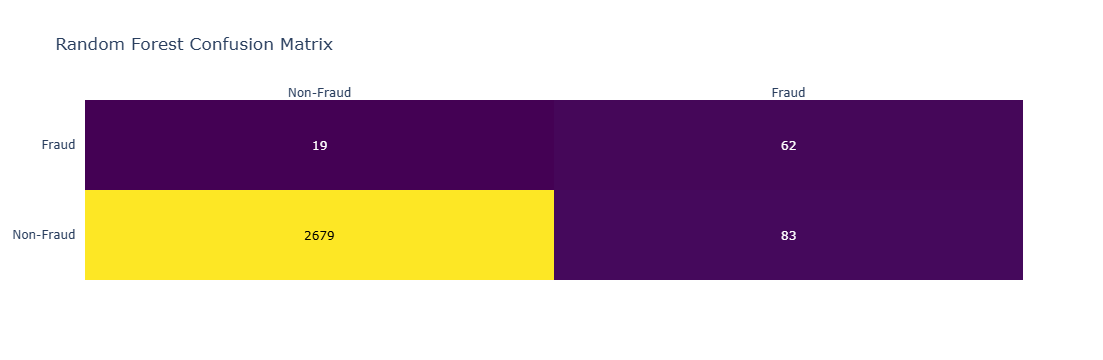

In [53]:
# Confusion Matrix for each model
for i, model in enumerate(models):
    cm = confusion_matrix(y_test, predictions[i])
    plot_confusion_matrix(cm, f"{model} Confusion Matrix")